In [19]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data=pd.read_csv("https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv")

In [30]:
data.shape

(5043, 28)

In [26]:

data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [28]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
#data=pd.concat([data1.drop(columns=["genres"]),data1.genres.str.get_dummies().add_prefix('Part_')],axis=1)



###  I wanted to know the distribution of facenumbers in the posters and Imdb scores in our given dataset to better know about this feature and as we can see most of the posters have 0-5 number of faces .its very rare to have more than 10 faces.

## From the distribution of imdb scores we can can see that most o fthe scores in our dataset lie in the range of 5-8

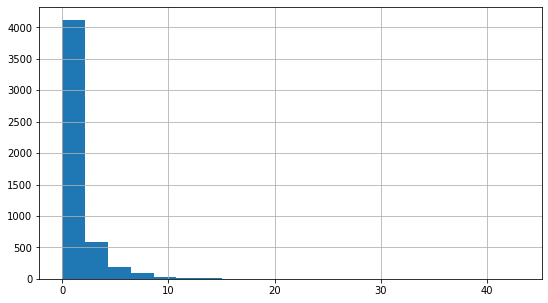

In [21]:
data.facenumber_in_poster.hist(bins=20,figsize=(9,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117472250>]],
      dtype=object)

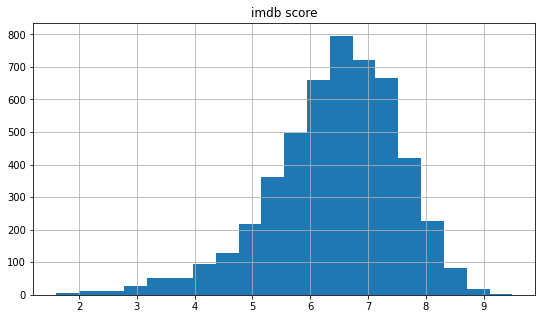

In [22]:

matplotlib.rcParams['figure.figsize'] = (9.0, 5.0)
scores = pd.DataFrame({"imdb score":data["imdb_score"]})
scores.hist(bins=20)

In [23]:
data._get_numeric_data().columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

### Correlation plot is important to identify variables that are highly correlated so that we can ### avoid the effects of multicollinearity in the dataset.
###  From the plot below we can see that actor1 fb likes is highly correlated to cast total fblikes
### num_voted_users is highly correlated to num_users_for_reviews

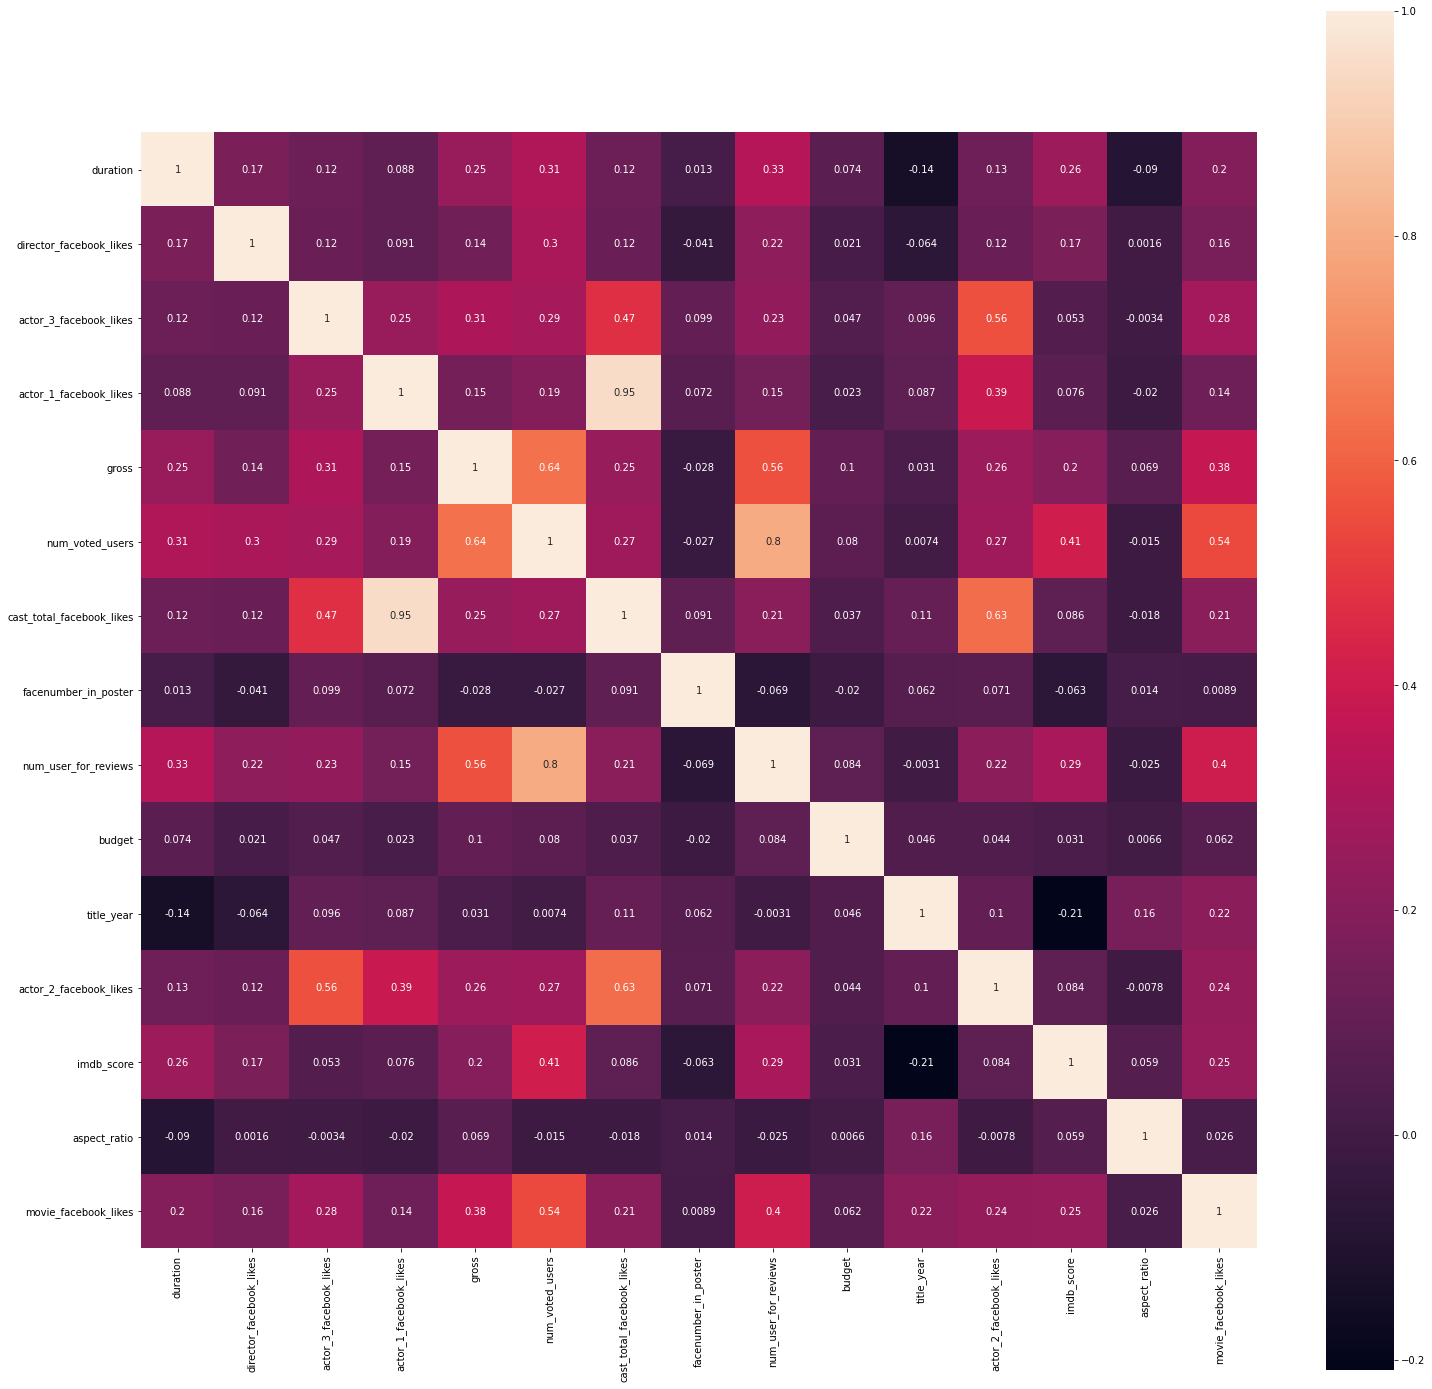

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, vmax=1, square=True,annot=True)


### Now lets identify variables that are most correlated to our target variable.This helps us indentifying variables that have most effect on target variable. 
## From this study we see that num_voted_users has the most effect on target variable and more voted users mean peoplle who genuinely liked the movie usually vote for it


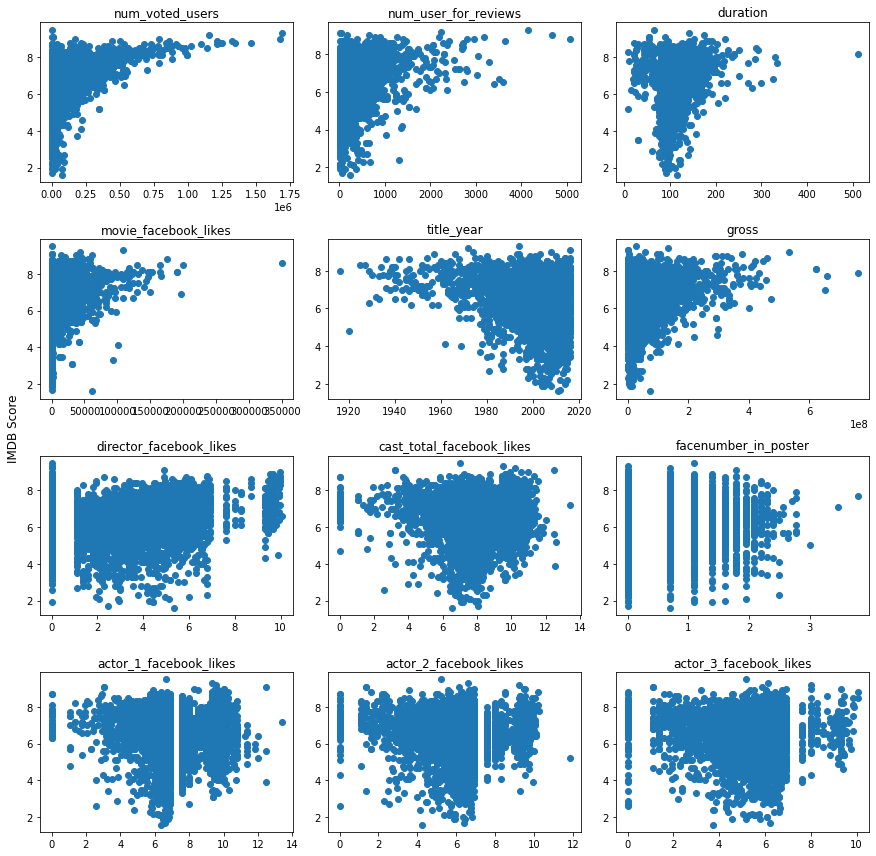

In [36]:
import numpy as np
f, axarr = plt.subplots(4, 3, figsize=(12, 12))
score = data.imdb_score.values

axarr[0, 0].scatter(data.num_voted_users.values, score)
axarr[0, 0].set_title('num_voted_users')
axarr[0, 1].scatter(data.num_user_for_reviews.values, score)
axarr[0, 1].set_title('num_user_for_reviews')
axarr[0, 2].scatter(data.duration.values, score)
axarr[0, 2].set_title('duration')
axarr[1, 0].scatter(data.movie_facebook_likes.values, score)
axarr[1, 0].set_title('movie_facebook_likes')
axarr[1, 1].scatter(data.title_year.values, score)
axarr[1, 1].set_title('title_year')
axarr[1, 2].scatter(data.gross.values, score)
axarr[1, 2].set_title('gross')

axarr[2, 0].scatter(np.log1p(data.director_facebook_likes.values), score)
axarr[2, 0].set_title('director_facebook_likes')
axarr[2, 1].scatter(np.log1p(data.cast_total_facebook_likes.values), score)
axarr[2, 1].set_title('cast_total_facebook_likes')
axarr[2, 2].scatter(np.log1p(data.facenumber_in_poster.values), score)
axarr[2, 2].set_title('facenumber_in_poster')


axarr[3, 0].scatter(np.log1p(data.actor_1_facebook_likes.values), score)
axarr[3, 0].set_title('actor_1_facebook_likes')
axarr[3, 1].scatter(np.log1p(data.actor_2_facebook_likes.values), score)
axarr[3, 1].set_title('actor_2_facebook_likes')
axarr[3, 2].scatter(np.log1p(data.actor_3_facebook_likes.values), score)
axarr[3, 2].set_title('actor_3_facebook_likes')


f.text(-0.01, 0.5, 'IMDB Score', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.savefig('correlation',bbox_inches='tight')
plt.show()


In [12]:
cor_dict = corr['imdb_score'].to_dict()
del cor_dict['imdb_score']
print("List the numerical features decendingly by their correlation with IMDB score:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with IMDB score:

num_voted_users: 	0.41096520027034994
Part_Drama: 	0.2942294153288741
num_user_for_reviews: 	0.29247543745185667
duration: 	0.26166152097667805
movie_facebook_likes: 	0.2470485190272491
title_year: 	-0.2091670045647585
gross: 	0.19802122755403362
Part_Horror: 	-0.18900056629701253
director_facebook_likes: 	0.17080222836186262
Part_Comedy: 	-0.1686193613223777
Part_Biography: 	0.15630984745094822
Part_History: 	0.11796197270495314
Part_War: 	0.11727857649230057
Part_Documentary: 	0.10285853660931771
Part_Action: 	-0.09787152587551934
cast_total_facebook_likes: 	0.0857873475480077
actor_2_facebook_likes: 	0.0838081121711098
actor_1_facebook_likes: 	0.07609881708768075
Part_Thriller: 	-0.0708567355356599
facenumber_in_poster: 	-0.06295752448505083
Part_Family: 	-0.06104205313106312
aspect_ratio: 	0.059445227874183416
Part_Sci-Fi: 	-0.05315787142567282
actor_3_facebook_likes: 	0.05263272957677825
Part_Crime: 	0.

## Checking for Missing values we realize that gross and budget has highest number of missing values.

In [13]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
Part_Action                    0
Part_Adventure                 0
Part_Animation                 0
Part_Biogr

### We see that most of the movies in our dataset are of english language hence language variable can easily be droppped from our study as it does not capure much variance

### Similarly variable color can also be dropped using same logic

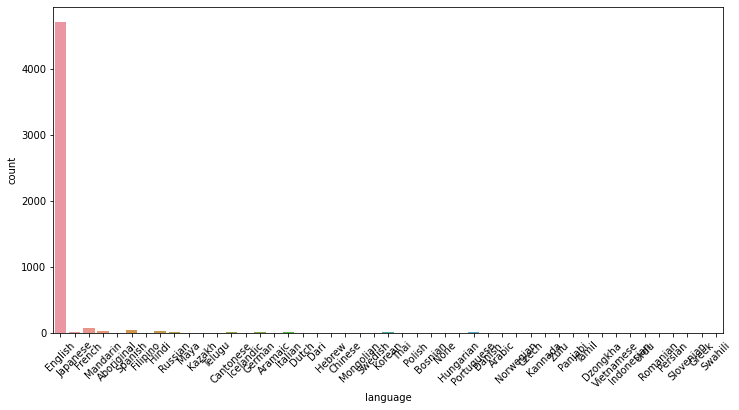

In [14]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'language', data = data)
xt = plt.xticks(rotation=45)

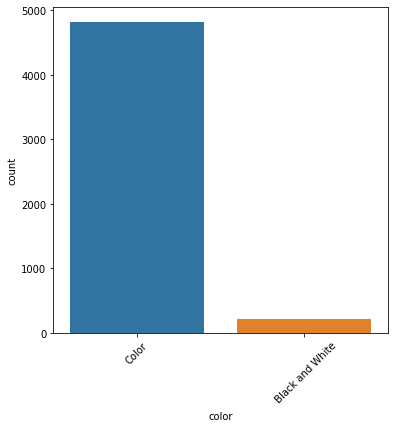

In [15]:
plt.figure(figsize = (6, 6))
sns.countplot(x = 'color', data = data)
xt = plt.xticks(rotation=45)

### Most of the content ratings are of type PG-13,PG,G or R.
### It would be interesting to see if fropping some or rest of the factors leads to any increase in the accuracy

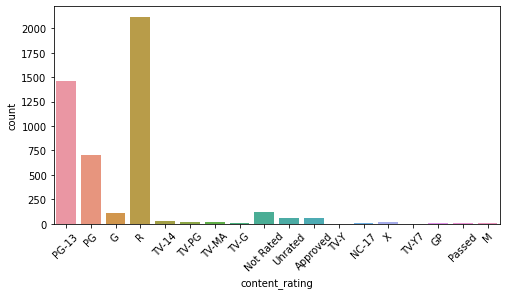

In [16]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'content_rating', data = data)
xt = plt.xticks(rotation=45)

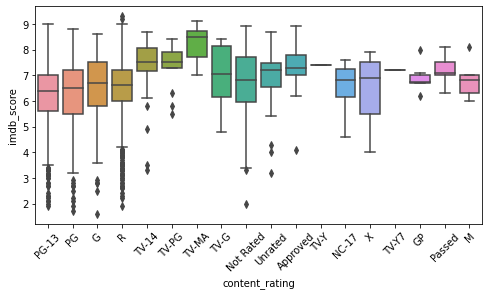

In [17]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = 'content_rating', y = 'imdb_score',  data = data)
xt = plt.xticks(rotation=45)


## It can be inferred that in black and white movies G and NR movies and higher mean scores than rest of the content ratings
## whereas in color NC-17 and unrated have higher scores than rest

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


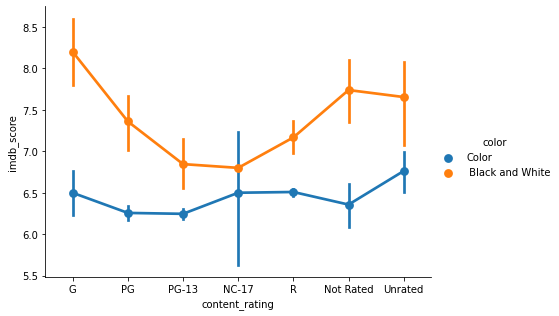

In [18]:
sns.factorplot('content_rating', 'imdb_score', hue = 'color', estimator = np.mean, data = data, 
             size = 4.5, aspect = 1.4, order = ['G', 'PG', 'PG-13', 'NC-17', 'R', 'Not Rated', 'Unrated'])

In [1]:
# from yellowbrick.regressor import CooksDistance
# visualizer = CooksDistance()


# visualizer.fit(X, y)
# visualizer.show()


NameError: name 'data' is not defined